# Car Price Prediction Task 2 - Improving The ML Model

In the original ML model used to predict car prices (based on their make, model year, transmission type, fuel type, and mileage) the algorithm used was RandomForestRegressor with no optimisation techniques applied. To attempt to improve upon this algorithm I tuned the hyperparameters, using cross-validation to prevent overfitting. This did improve the result. 

I also tested several other regression models and the best result came from plain linear regression, giving a result which was better than using random forest with the improved hyperparameters. 

In order to further improve results I would try more feature improvement and engineering techniques in addition to the categorical encoding. For example, the majority of the variables are 0s and 1s due to the one hot encoding with only two columns populated by larger and more varying numbers and scaling these columns during preprocessing could improve results. It may also improve results to look further into the data provided for potential issues such as outliers which could be removed or replaced. I would also tune hyperparameters for the regression models that allow it.  

In [2]:
import pandas as pd
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

## Data Ingestion and Preprocessing

In [3]:
df = pd.read_csv("used_cars_data.csv")
# One hot encoding for categorical features
enc = OneHotEncoder(handle_unknown='ignore')
X = df[['brand', 'fuel', 'gearbox']]
enc.fit(X)
X_features = pd.DataFrame(enc.transform(df[['brand', 'fuel', 'gearbox']]).toarray())
# Feature transforming
year = datetime.datetime.now().year
df['age'] = year-df['year']
X_num = df[['age', 'mileage (kms)']]
y = df['price (eur)']
X = pd.concat([X_num, X_features], axis=1)

## Model Training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees in forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#number of features to consider at each split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num=11)]
#minimum number of samples needed to split a node
min_samples_split = [2, 5, 10]
#minimum number of samples at each leaf node
min_samples_leaf = [1, 2, 4]
#method for selecting samples for training each tree
bootstrap = [True, False]

In [6]:
#create random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [7]:
#using random grid to search for best hyperparameters
#base model
rf = RandomForestRegressor()
#3 fold cross validation over 100 combinations
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42,
                              n_jobs=-1)
#fitting random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature na

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [8]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 64,
 'bootstrap': True}

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=37

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, max_depth=73, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   6.0s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.9s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.0s
[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.9s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.2s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.2s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   4.4s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   6.2s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.4s
[CV] END bootstrap=False, max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=False, max_depth=

## Evaluating initial model vs best params

In [9]:
regr = RandomForestRegressor() #no change to hyperparameters
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

4547.15490514388
3255.4809160305344


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [10]:
regr = RandomForestRegressor(n_estimators=2000, min_samples_split=5,min_samples_leaf=1,
                             max_features='sqrt', max_depth=64, bootstrap=True) #using 'best' hyperparameters 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


4325.56934182068
3037.150076898452


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Better result than original model, can be further tuned

## Evaluating Other ML Models

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

3846.1051192045306
2849.867528226712


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Better result than the random forest with some hyperparameter tuning. Linear regression alone does not have hyperparameters. Trying ridge, bayesian ridge, lasso, and logistic regression.

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


6419.765637443057
4584.045801526718


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Much worse result. 

In [13]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

3938.61385155612
2883.3956146300484


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

3852.7794271199446
2846.5177714962656


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

6263.595719598136
4656.444302964576


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [42]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

6586.860768991275
4959.072519083969


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)
errors2 = mean_absolute_error(y_test, y_pred)
print(errors2)

4163.551185199102
2953.831264481943


/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/tiwarim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [13]:
df

,Unnamed: 0,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location,age
0,0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers,7
1,1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans,9
2,2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans,12
3,3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans,5
4,4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1,7
...,...,...,...,...,...,...,...,...,...,...,...
787,787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá,7
788,788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans,5
789,789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró,4
790,790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró,9


## Data Analysis for Better Insight

In [24]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop(['Unnamed: 0'], axis=1)
df_num.head()

,price (eur),year,mileage (kms),age
0,8990,2016,67000,7
1,9990,2014,104868,9
2,13490,2011,137566,12
3,24990,2018,44495,5
4,10460,2016,69800,7


array([[<AxesSubplot: title={'center': 'price (eur)'}>,
        <AxesSubplot: title={'center': 'year'}>],
       [<AxesSubplot: title={'center': 'mileage (kms)'}>,
        <AxesSubplot: title={'center': 'age'}>]], dtype=object)

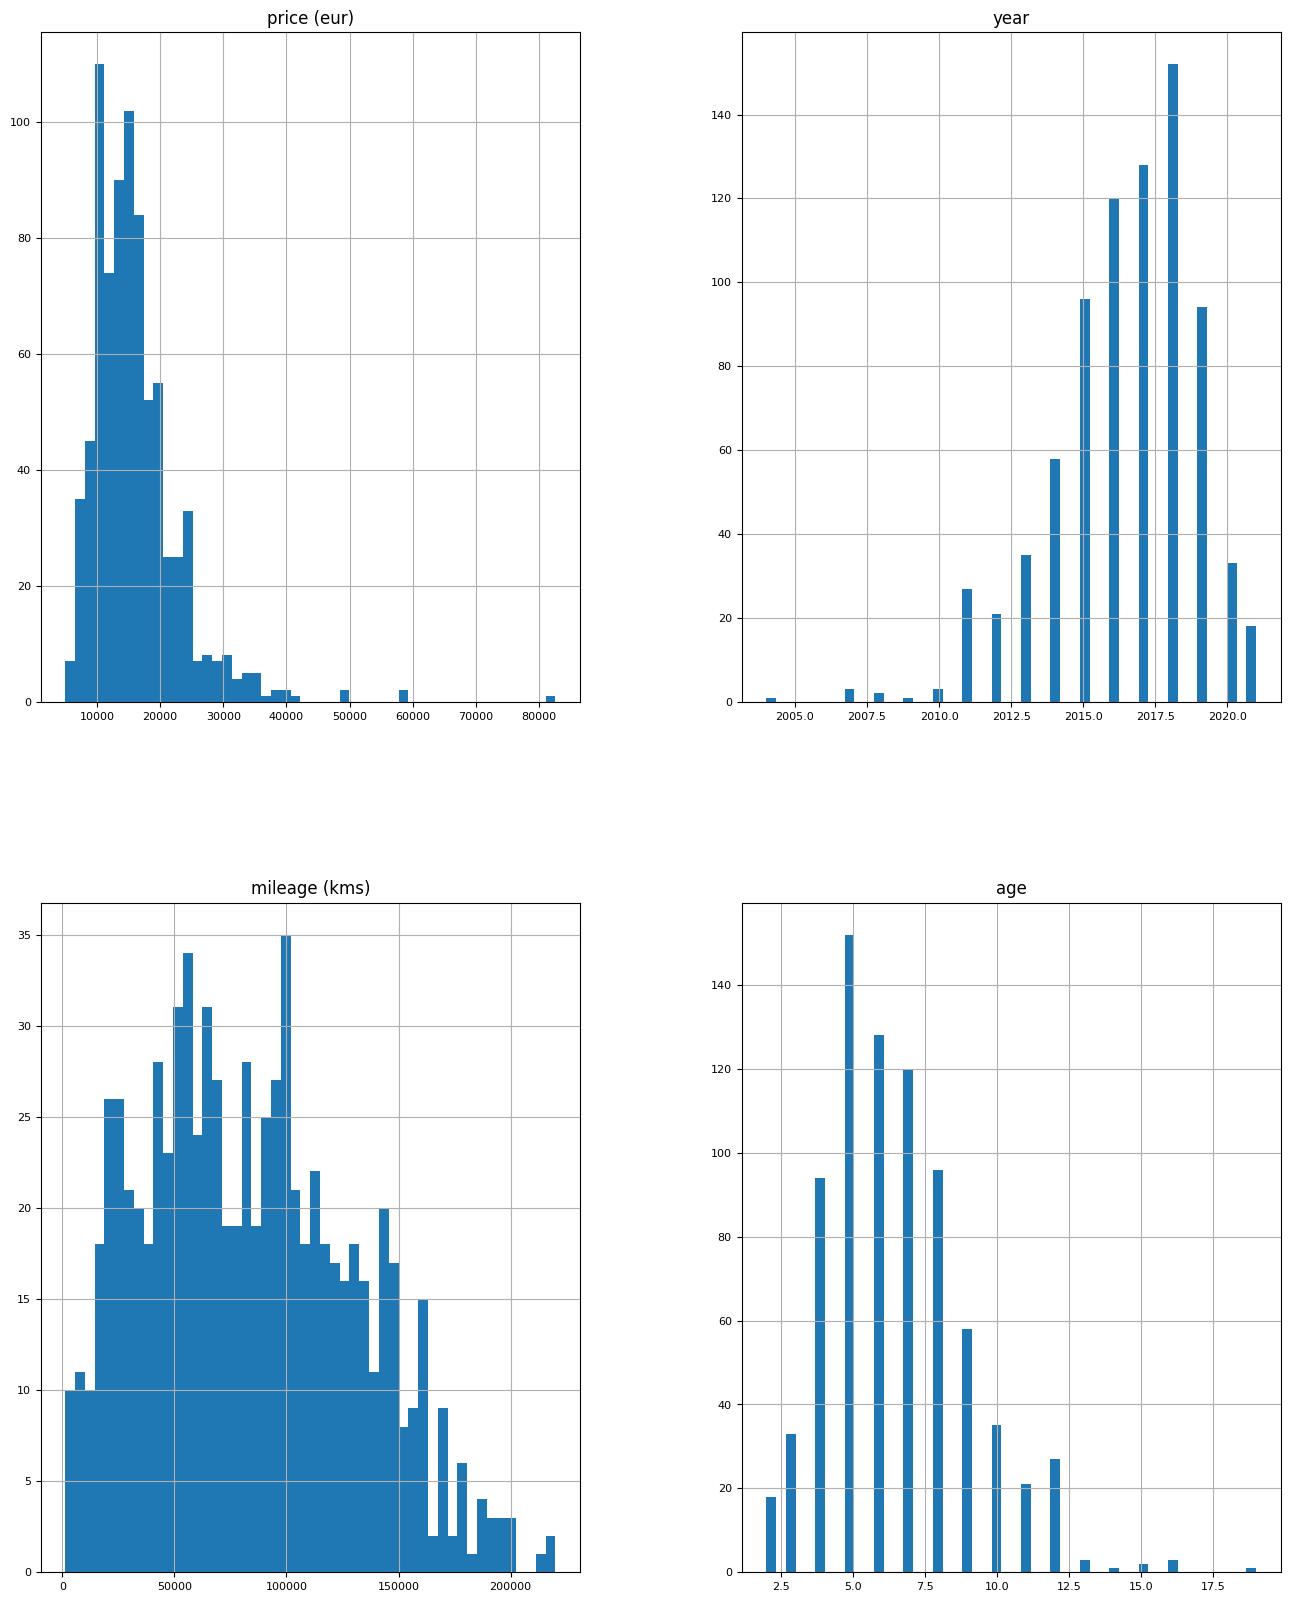

In [26]:
"""Seeing distribution of numerical values"""
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [36]:
"""Checking which numerical columns correlate with price"""
df_num_corr = df_num.corr()['price (eur)']
features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print(features_list)

price (eur)      1.000000
year             0.375663
mileage (kms)   -0.197380
age             -0.375663
Name: price (eur), dtype: float64


The age of the car has more effect on price than mileage.

In [48]:
avg_brand = pd.DataFrame(columns=['brand', 'avg price (eur)', 'median price', '1st quartile',
                                  '3rd quartile', 'interquartile range'])
brands = df['brand'].tolist()
for brand in brands:
    new_df = df.loc[df['brand'] == brand]
    mean_price = new_df['price (eur)'].mean()
    median = new_df['price (eur)'].median()
    first = new_df['price (eur)'].quantile(0.25)
    third = new_df['price (eur)'].quantile(0.75)
    diff = third-first
    new_row = {'brand': brand, 'avg price (eur)': mean_price, 'median price': median, '1st quartile': first,
              '3rd quartile': third, 'interquartile range': diff}
    avg_brand.loc[len(avg_brand)] = new_row

avg_brand.head()

,brand,avg price (eur),median price,1st quartile,3rd quartile,interquartile range
0,SEAT,14828.452381,13535.0,10990.0,17115.0,6125.0
1,Hyundai,15429.130435,15490.0,13140.0,16990.0,3850.0
2,BMW,21667.368421,20490.0,14990.0,24990.0,10000.0
3,Volkswagen,16747.843137,15990.0,13740.0,19290.0,5550.0
4,Opel,12419.032258,11490.0,10695.0,15490.0,4795.0


<AxesSubplot: xlabel='brand', ylabel='price (eur)'>

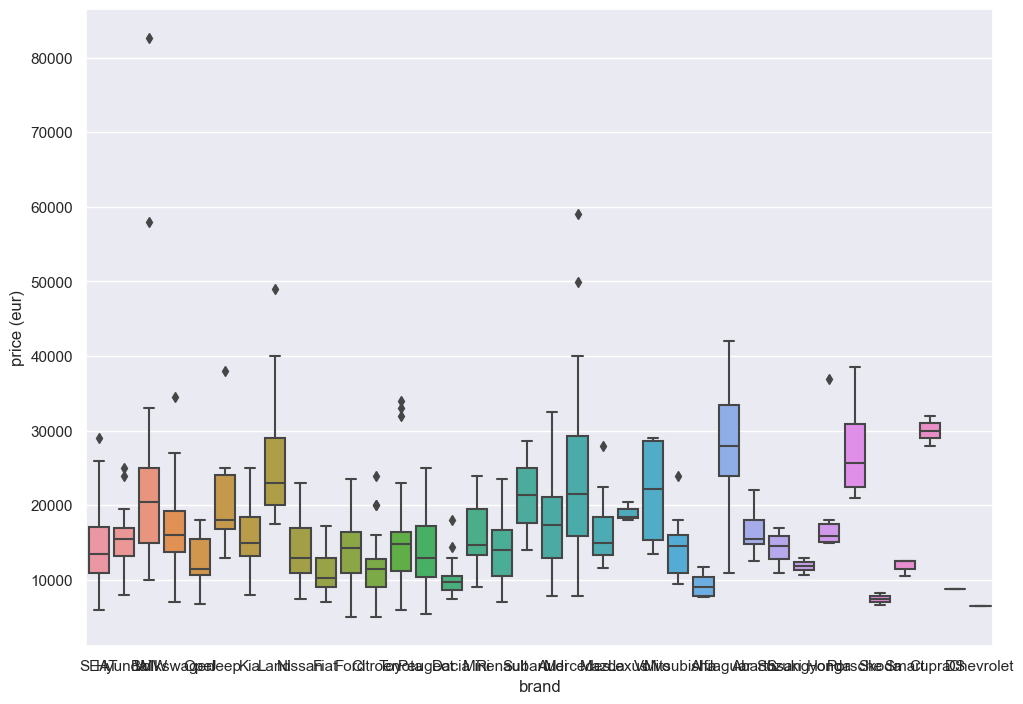

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x='brand', y='price (eur)')

Split brands list into two to see more clearly. Can see that there are outliers for the price being much higher than usual so could remove outliers after splitting dataset into train and test sets and see if that improves the model accuracy.